In [ ]:
import pandas as pd
import numpy as np
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Benchmarking Functions

In [ ]:
# Implementing all 10 benchmark functions for continuous optimization

def f1_easom(x):
    # Usually defined for 2D only
    if len(x) != 2:
        raise ValueError("Easom function is defined for 2D only.")
    return -np.cos(x[0]) * np.cos(x[1]) * np.exp(-((x[0]-np.pi)**2 + (x[1]-np.pi)**2))

def f2_becker_lago(x):
    return np.sum((x**2 + 0.5*x + 1)**2)

def f3_bohachevsky(x):
    if len(x) != 2:
        raise ValueError("Bohachevsky function is defined for 2D only.")
    return x[0]**2 + 2*x[1]**2 - 0.3*np.cos(3*np.pi*x[0]) - 0.4*np.cos(4*np.pi*x[1]) + 0.7

def f4_eggcrate(x):
    if len(x) != 2:
        raise ValueError("Eggcrate function is defined for 2D only.")
    return x[0]**2 + x[1]**2 + 25*(np.sin(x[0])**2 + np.sin(x[1])**2)

def f5_periodic_eval(x):
    return 1 + np.sum((np.sin(x)**2) * (1 + 0.1*(x**2)))

def f6_sphere(x):
    return np.sum(x**2)

def f7_rosenbrock(x):
    return np.sum(100*(x[1:] - x[:-1]**2)**2 + (x[:-1] - 1)**2)

def f8_rastrigin(x):
    return 10*len(x) + np.sum(x**2 - 10*np.cos(2*np.pi*x))

def f9_schwefel(x):
    return 418.9829*len(x) - np.sum(x * np.sin(np.sqrt(np.abs(x))))

def f10_griewank(x):
    sum_part = np.sum(x**2) / 4000
    prod_part = np.prod(np.cos(x / np.sqrt(np.arange(1, len(x)+1))))
    return sum_part - prod_part + 1

# Dictionary of all benchmark functions
benchmark_functions = {
    "F1_Easom2D": f1_easom,
    "F2_BeckerLago": f2_becker_lago,
    "F3_Bohachevsky": f3_bohachevsky,
    "F4_Eggcrate": f4_eggcrate,
    "F5_PeriodicEval": f5_periodic_eval,
    "F6_Sphere": f6_sphere,
    "F7_Rosenbrock": f7_rosenbrock,
    "F8_Rastrigin": f8_rastrigin,
    "F9_Schwefel": f9_schwefel,
    "F10_Griewank": f10_griewank
}

# Display function names and short descriptions
import pandas as pd
df = pd.DataFrame({
    "Function": list(benchmark_functions.keys()),
    "Description": [
        "Easom (2D, sharp global min)",
        "Becker & Lago (quadratic form)",
        "Bohachevsky (2D, cosine modulations)",
        "Eggcrate (2D, sinusoidal surface)",
        "Periodic Evaluation (oscillatory)",
        "Sphere (simple quadratic bowl)",
        "Rosenbrock (banana function)",
        "Rastrigin (many local minima)",
        "Schwefel (deceptive global min)",
        "Griewank (non-separable, smooth)"
    ]
})



pd.set_option("display.max_rows", None)  # Optional: show all rows
print(df)


          Function                           Description
0       F1_Easom2D          Easom (2D, sharp global min)
1    F2_BeckerLago        Becker & Lago (quadratic form)
2   F3_Bohachevsky  Bohachevsky (2D, cosine modulations)
3      F4_Eggcrate     Eggcrate (2D, sinusoidal surface)
4  F5_PeriodicEval     Periodic Evaluation (oscillatory)
5        F6_Sphere        Sphere (simple quadratic bowl)
6    F7_Rosenbrock          Rosenbrock (banana function)
7     F8_Rastrigin         Rastrigin (many local minima)
8      F9_Schwefel       Schwefel (deceptive global min)
9     F10_Griewank      Griewank (non-separable, smooth)


Ploting the Benchmark Functions

In [ ]:
# --- Define Benchmark Functions Here (assumed already defined) ---

# --- Define bounds per function ---
benchmark_bounds = {
    "F1_Easom2D": (-10, 10),         # "F1_Easom2D": (-100, 100) " this is the original boundary. we tried to make it plotable
    "F2_BeckerLago": (-10, 10),
    "F3_Bohachevsky": (-50, 50),
    "F4_Eggcrate": (-2 * np.pi, 2 * np.pi),
    "F5_PeriodicEval": (-10, 10),
    "F6_Sphere": (-5.12, 5.12),
    "F7_Rosenbrock": (-30, 30),
    "F8_Rastrigin": (-5.12, 5.12),
    "F9_Schwefel": (-500, 500),
    "F10_Griewank": (-600, 600)
}

# --- Plot All Benchmark Functions (2D or Projected) ---
for name, func in benchmark_functions.items():
    print(f"Plotting benchmark function: {name}")

    def func_wrapper(x, y):
        # If 2D, pass directly
        if name in ["F1_Easom2D", "F3_Bohachevsky", "F4_Eggcrate"]:
            return func(np.array([x, y]))
        else:
            # For high-dimensional: fix remaining dims at 0
            dim = 30
            vec = np.zeros(dim)
            vec[0], vec[1] = x, y
            return func(vec)

    # Use original bounds
    x_range = y_range = benchmark_bounds[name]

    x = np.linspace(x_range[0], x_range[1], 200)
    y = np.linspace(y_range[0], y_range[1], 200)
    X, Y = np.meshgrid(x, y)
    Z = np.array([[func_wrapper(xi, yi) for xi in x] for yi in y])

    # --- 3D Plot ---
    fig = plt.figure(figsize=(18, 27))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.9)

    ax.set_title(f"{name} - Surface View")
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_zlabel("Function Value")
    plt.tight_layout()
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

Neighbouring Functions

In [ ]:
def gaussian_mutation(x, bounds, sigma=0.1):
    """Add Gaussian noise to all dimensions."""
    return [
        min(max(x[i] + random.gauss(0, sigma), bounds[i][0]), bounds[i][1])
        for i in range(len(x))
    ]

def uniform_mutation(x, bounds, epsilon=0.1):
    """Add uniform noise to all dimensions."""
    return [
        min(max(x[i] + random.uniform(-epsilon, epsilon), bounds[i][0]), bounds[i][1])
        for i in range(len(x))
    ]

def cauchy_mutation(x, bounds, scale=0.1):
    """Add heavy-tailed noise to all dimensions using Cauchy-like behavior."""
    return [
        min(max(x[i] + random.gauss(0, scale) / (1 + abs(random.gauss(0, scale))), bounds[i][0]), bounds[i][1])
        for i in range(len(x))
    ]

def coordinate_mutation(x, bounds, sigma=0.1):
    """Mutate a single randomly chosen coordinate using Gaussian noise."""
    i = random.randint(0, len(x) - 1)
    x_new = x[:]
    x_new[i] = min(max(x[i] + random.gauss(0, sigma), bounds[i][0]), bounds[i][1])
    return x_new

def adaptive_gaussian_mutation(x, bounds, T, sigma=0.1):
    """Add temperature-scaled Gaussian noise to all dimensions."""
    return [
        min(max(x[i] + random.gauss(0, sigma * T), bounds[i][0]), bounds[i][1])
        for i in range(len(x))
    ]

# Collection of neighbor functions
continuous_neighbor_functions = [
    gaussian_mutation,
    uniform_mutation,
    cauchy_mutation,
    coordinate_mutation,
    adaptive_gaussian_mutation
]


Roulette Wheel:

In [ ]:
# Initialize equal roulette scores
roulette_scores = [1.0 for _ in continuous_neighbor_functions]

# Roulette Wheel Selector
def roulette_wheel_select(weights):
    total = sum(weights)
    pick = random.uniform(0, total)
    current = 0
    for i, w in enumerate(weights):
        current += w
        if current >= pick:
            return i
    return len(weights) - 1  # fallback in case of rounding errors


Enhanced SA

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

def enhanced_simulated_annealing_continuous_with_convergence(
    func, bounds, dim=30,
    T0=1000, alpha=0.97, beta=1,
    Mk=20, max_temp_loops=1000,
    cooling='default'
):
    global roulette_scores
    current_solution = [random.uniform(bounds[i][0], bounds[i][1]) for i in range(dim)]
    current_cost = func(np.array(current_solution))
    best_solution = current_solution[:]
    best_cost = current_cost
    T = T0
    k = 1
    convergence = []

    for _ in range(max_temp_loops):
        for _ in range(Mk):
            idx = roulette_wheel_select(roulette_scores)
            neighbor = continuous_neighbor_functions[idx]
            if neighbor.__name__ == "adaptive_gaussian_mutation":
                candidate = neighbor(current_solution, bounds, T)
            else:
                candidate = neighbor(current_solution, bounds)

            candidate_cost = func(np.array(candidate))
            delta = candidate_cost - current_cost

            if delta <= 0 or random.random() < math.exp(-delta / T):
                current_solution = candidate
                current_cost = candidate_cost
                roulette_scores[idx] += 1
                if current_cost < best_cost:
                    best_solution = current_solution[:]
                    best_cost = current_cost
            else:
                roulette_scores[idx] *= 0.99

        convergence.append(best_cost)

        # --- Cooling ---
        if cooling == 'default':
            T *= alpha
        elif cooling == 'linear':
            T -= beta
            T = max(T, 1e-8)
        elif cooling == 'logarithmic':
            T = T0 / math.log(k + 1)
        else:
            raise ValueError(f"Unknown cooling method: {cooling}")

        k += 1

    return best_solution, best_cost, convergence


Simple SA

In [ ]:
def sa_single_neighbor_with_convergence(
    func, bounds, dim=30,
    T0=1000, alpha=0.97, beta=1,
    Mk=20, max_temp_loops=1000,
    cooling='default'
):
    current_solution = [random.uniform(bounds[i][0], bounds[i][1]) for i in range(dim)]
    current_cost = func(np.array(current_solution))
    best_solution = current_solution[:]
    best_cost = current_cost
    T = T0
    k = 1
    convergence = []

    for _ in range(max_temp_loops):
        for _ in range(Mk):
            candidate = gaussian_mutation(current_solution, bounds)
            candidate_cost = func(np.array(candidate))
            delta = candidate_cost - current_cost
            if delta <= 0 or random.random() < math.exp(-delta / T):
                current_solution = candidate
                current_cost = candidate_cost
                if current_cost < best_cost:
                    best_solution = current_solution[:]
                    best_cost = current_cost

        convergence.append(best_cost)

        if cooling == 'default':
            T *= alpha
        elif cooling == 'linear':
            T -= beta
            T = max(T, 1e-8)
        elif cooling == 'logarithmic':
            T = T0 / math.log(k + 1)
        else:
            raise ValueError(f"Unknown cooling method: {cooling}")
        k += 1

    return best_solution, best_cost, convergence


Running Benchmarking Functions


Running benchmark for: F1_Easom2D
Run 1: Simple SA = 0.000000, Enhanced SA = -0.000000
Run 2: Simple SA = -0.000000, Enhanced SA = -0.000000
Run 3: Simple SA = -0.000000, Enhanced SA = -0.000000
Run 4: Simple SA = 0.000000, Enhanced SA = -0.000000
Run 5: Simple SA = -0.000000, Enhanced SA = -0.000000
Run 6: Simple SA = -0.000000, Enhanced SA = -0.000000
Run 7: Simple SA = 0.000000, Enhanced SA = -0.219585
Run 8: Simple SA = -0.000000, Enhanced SA = -0.000000
Run 9: Simple SA = -0.000000, Enhanced SA = 0.000000
Run 10: Simple SA = -0.000000, Enhanced SA = 0.000000


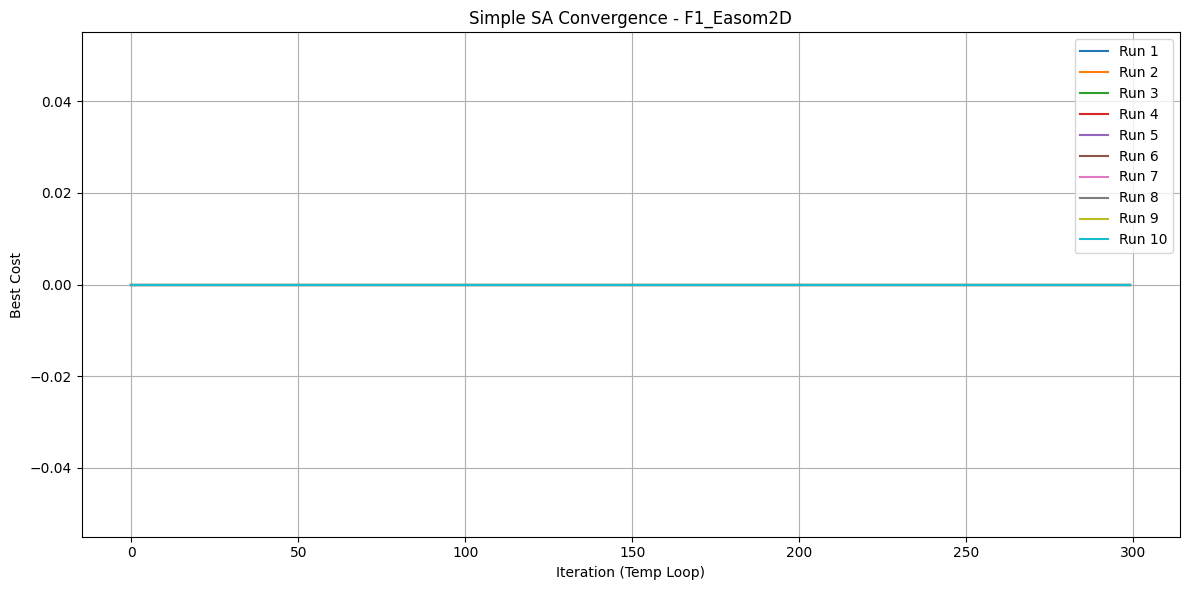

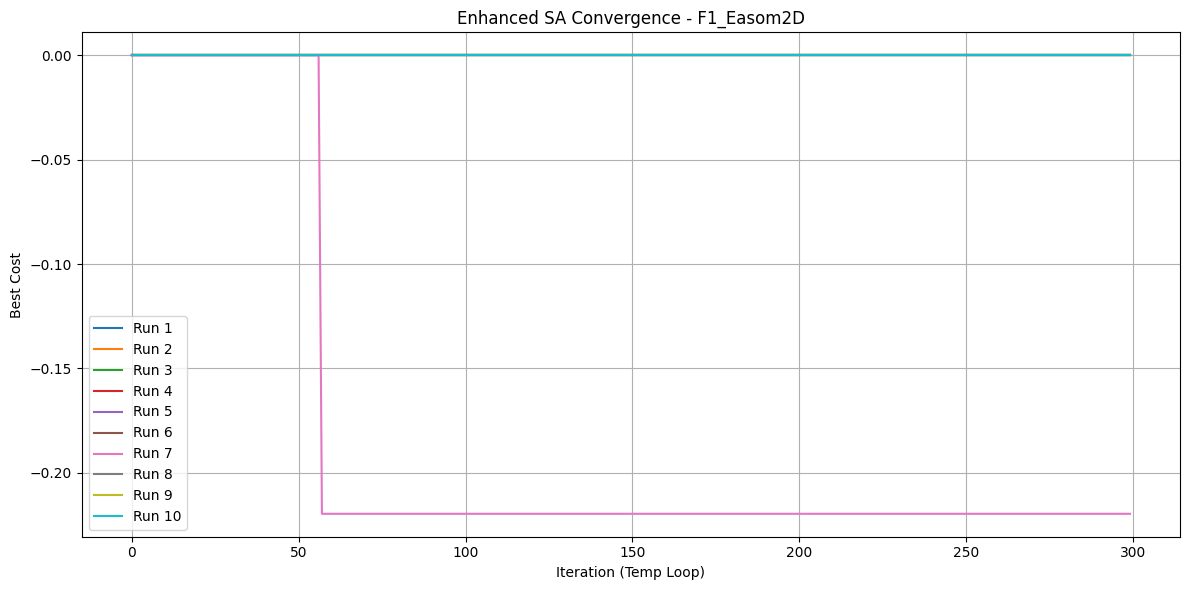


Running benchmark for: F2_BeckerLago
Run 1: Simple SA = 28.003204, Enhanced SA = 28.583833
Run 2: Simple SA = 27.546027, Enhanced SA = 27.963694
Run 3: Simple SA = 27.513962, Enhanced SA = 27.610539
Run 4: Simple SA = 27.732179, Enhanced SA = 27.814165
Run 5: Simple SA = 27.502112, Enhanced SA = 27.857492
Run 6: Simple SA = 27.875185, Enhanced SA = 28.031154
Run 7: Simple SA = 27.564096, Enhanced SA = 28.107115
Run 8: Simple SA = 28.042454, Enhanced SA = 28.041614
Run 9: Simple SA = 27.832378, Enhanced SA = 28.098471
Run 10: Simple SA = 27.892130, Enhanced SA = 28.015223


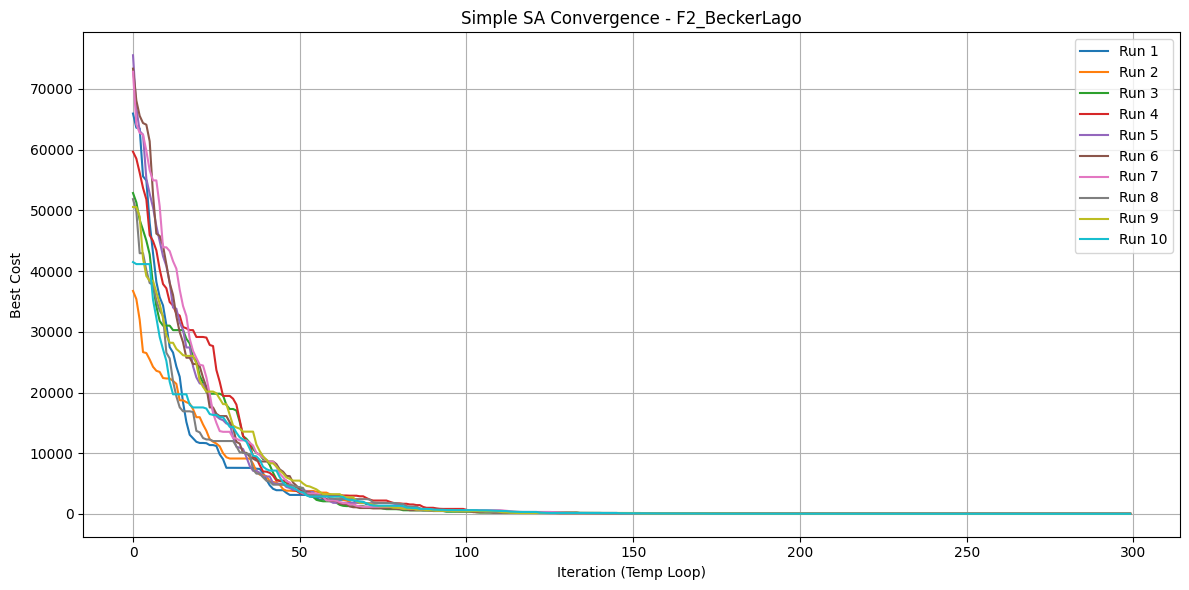

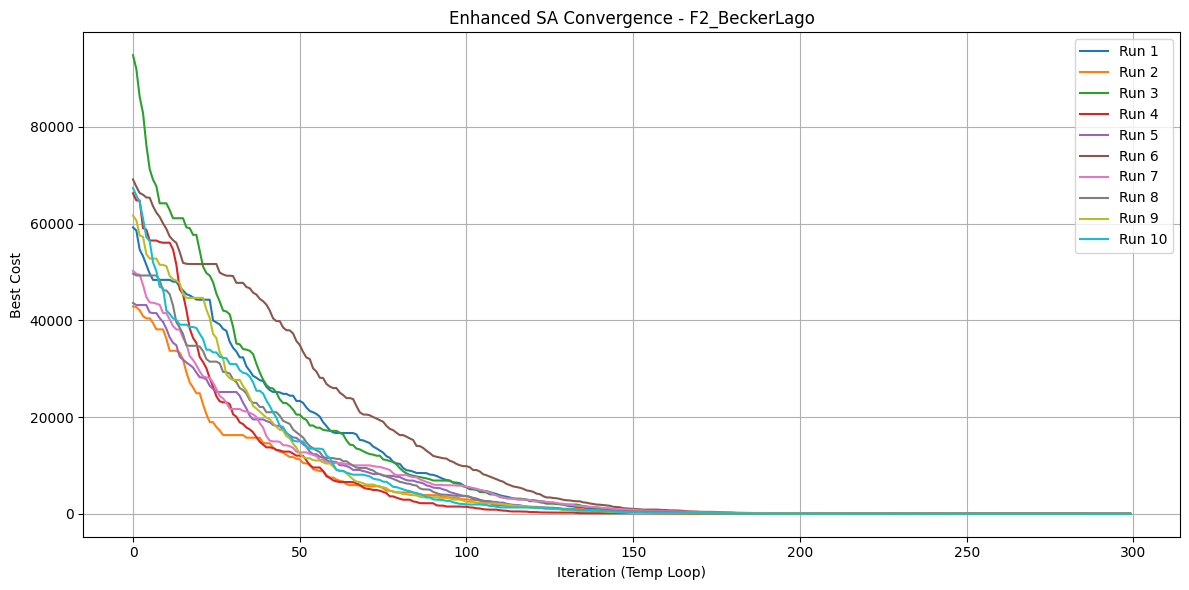


Running benchmark for: F3_Bohachevsky
Run 1: Simple SA = 0.001531, Enhanced SA = 0.001091
Run 2: Simple SA = 0.001622, Enhanced SA = 0.002015
Run 3: Simple SA = 0.000096, Enhanced SA = 0.001222
Run 4: Simple SA = 0.001114, Enhanced SA = 0.001232
Run 5: Simple SA = 0.000583, Enhanced SA = 0.000681
Run 6: Simple SA = 0.000345, Enhanced SA = 0.000016
Run 7: Simple SA = 0.000013, Enhanced SA = 0.000766
Run 8: Simple SA = 0.001411, Enhanced SA = 0.000182
Run 9: Simple SA = 0.000086, Enhanced SA = 0.001373
Run 10: Simple SA = 0.001247, Enhanced SA = 0.000709


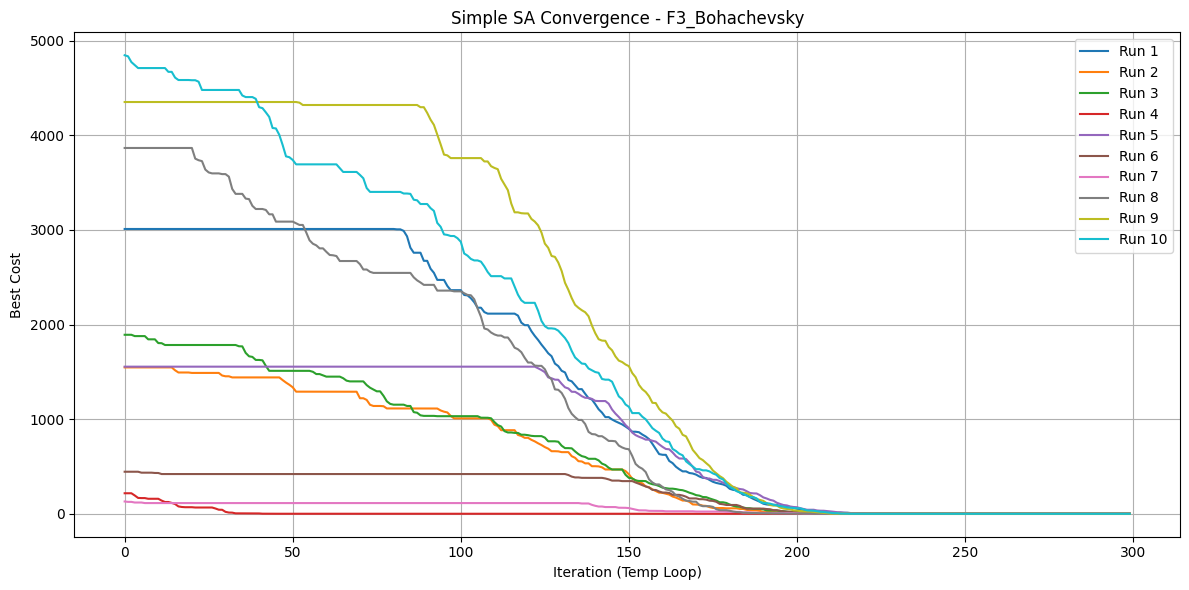

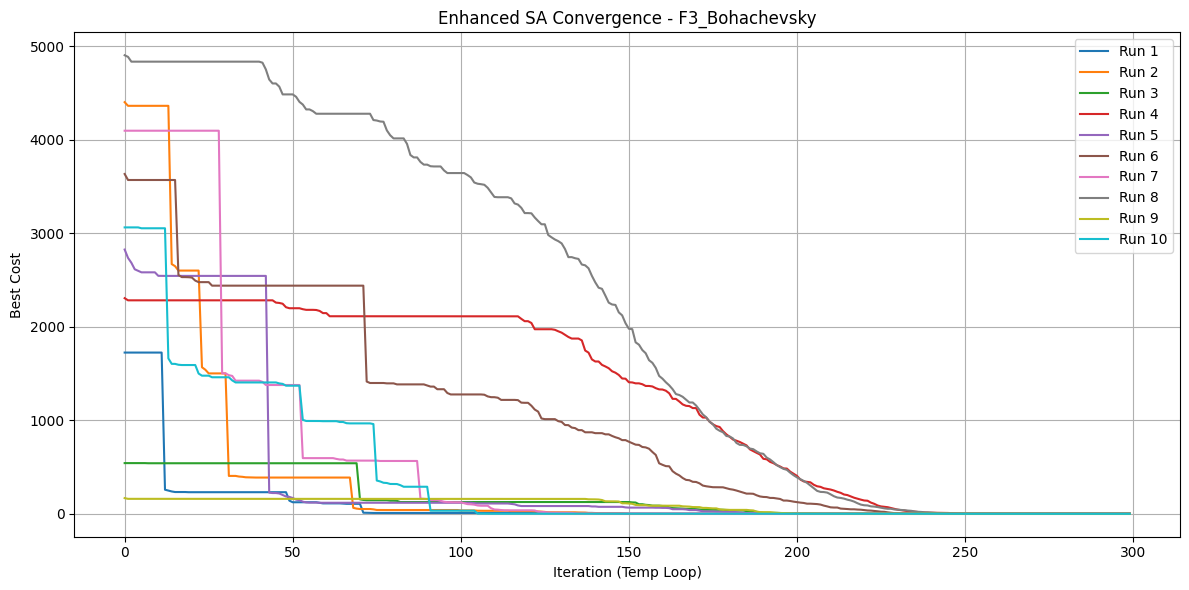


Running benchmark for: F4_Eggcrate
Run 1: Simple SA = 2.105284, Enhanced SA = 5.265235
Run 2: Simple SA = 9.488508, Enhanced SA = 9.488730
Run 3: Simple SA = 18.980820, Enhanced SA = 9.302450
Run 4: Simple SA = 18.977290, Enhanced SA = 1.380474
Run 5: Simple SA = 0.204567, Enhanced SA = 0.016122
Run 6: Simple SA = 0.496318, Enhanced SA = 0.035255
Run 7: Simple SA = 10.840258, Enhanced SA = 5.953186
Run 8: Simple SA = 0.000198, Enhanced SA = 0.011036
Run 9: Simple SA = 0.484371, Enhanced SA = 0.000250
Run 10: Simple SA = 19.002014, Enhanced SA = 0.000031


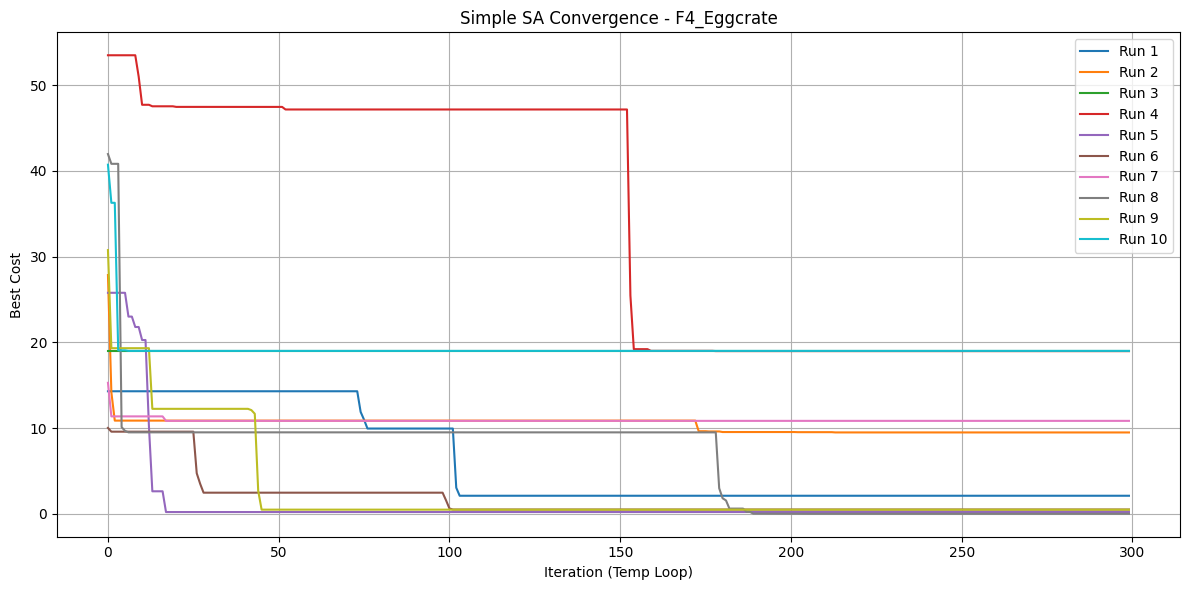

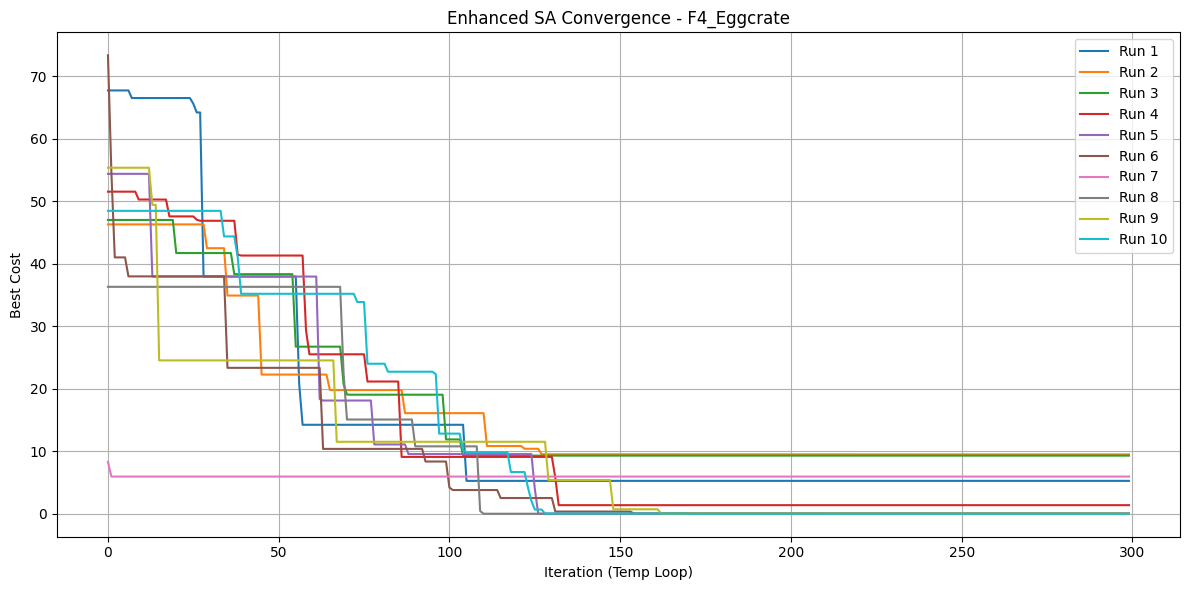


Running benchmark for: F5_PeriodicEval
Run 1: Simple SA = 3.648609, Enhanced SA = 4.694810
Run 2: Simple SA = 2.360358, Enhanced SA = 4.107540
Run 3: Simple SA = 3.406227, Enhanced SA = 3.542582
Run 4: Simple SA = 2.728414, Enhanced SA = 3.803540
Run 5: Simple SA = 3.245236, Enhanced SA = 2.774259
Run 6: Simple SA = 3.250659, Enhanced SA = 2.964828
Run 7: Simple SA = 3.850968, Enhanced SA = 3.498821
Run 8: Simple SA = 3.139425, Enhanced SA = 2.477999
Run 9: Simple SA = 2.721197, Enhanced SA = 3.324046
Run 10: Simple SA = 4.120309, Enhanced SA = 4.032378


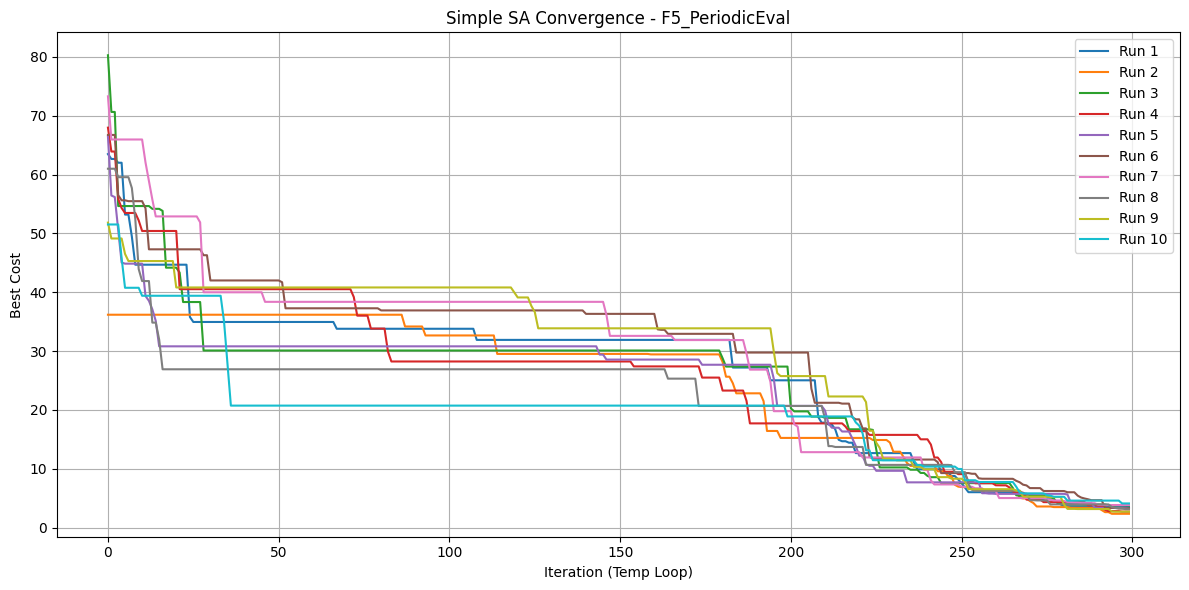

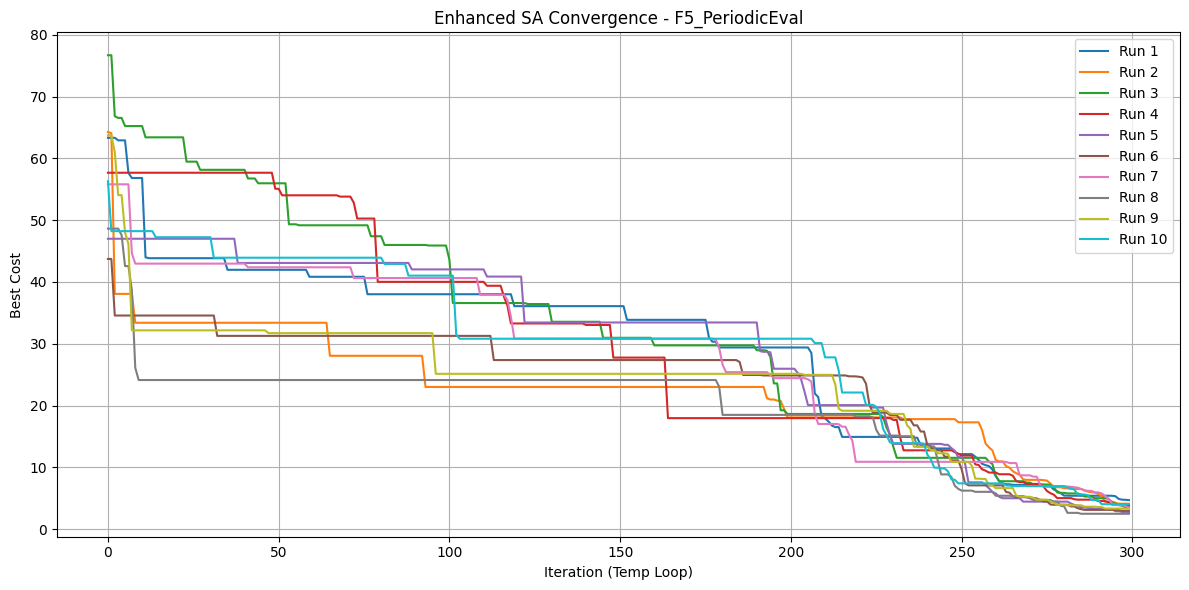


Running benchmark for: F6_Sphere
Run 1: Simple SA = 1.136152, Enhanced SA = 1.646328
Run 2: Simple SA = 1.461448, Enhanced SA = 1.931297
Run 3: Simple SA = 1.445903, Enhanced SA = 1.661237
Run 4: Simple SA = 1.097643, Enhanced SA = 1.449216
Run 5: Simple SA = 0.887584, Enhanced SA = 1.451496
Run 6: Simple SA = 1.248527, Enhanced SA = 1.087331
Run 7: Simple SA = 1.646195, Enhanced SA = 1.328343
Run 8: Simple SA = 1.004545, Enhanced SA = 2.645575
Run 9: Simple SA = 1.485947, Enhanced SA = 2.856959
Run 10: Simple SA = 1.046121, Enhanced SA = 1.538537


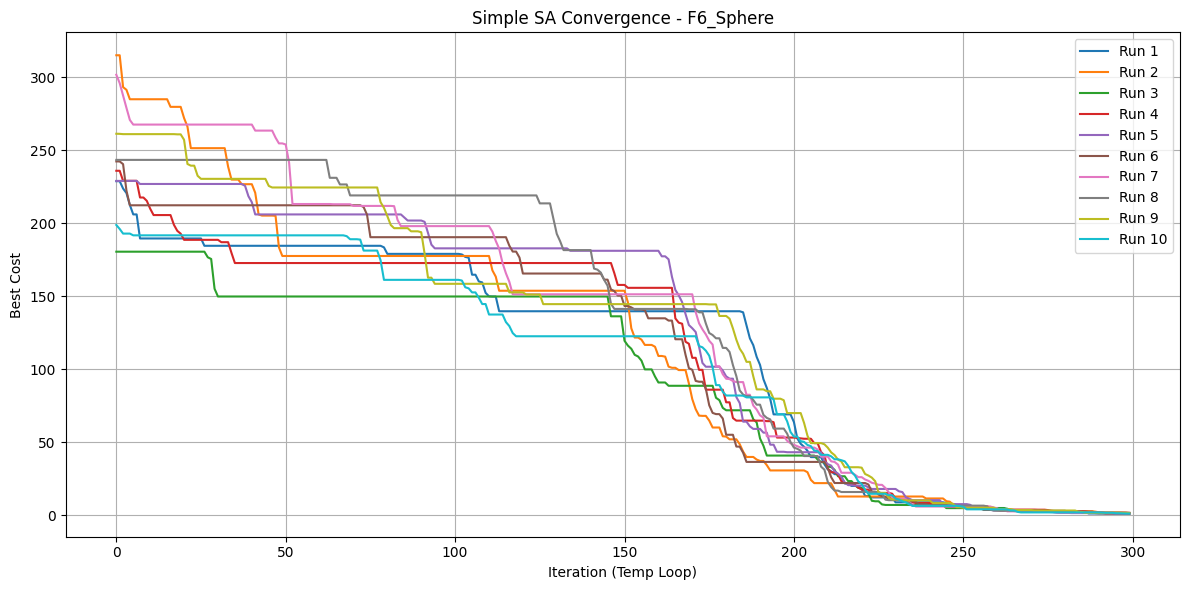

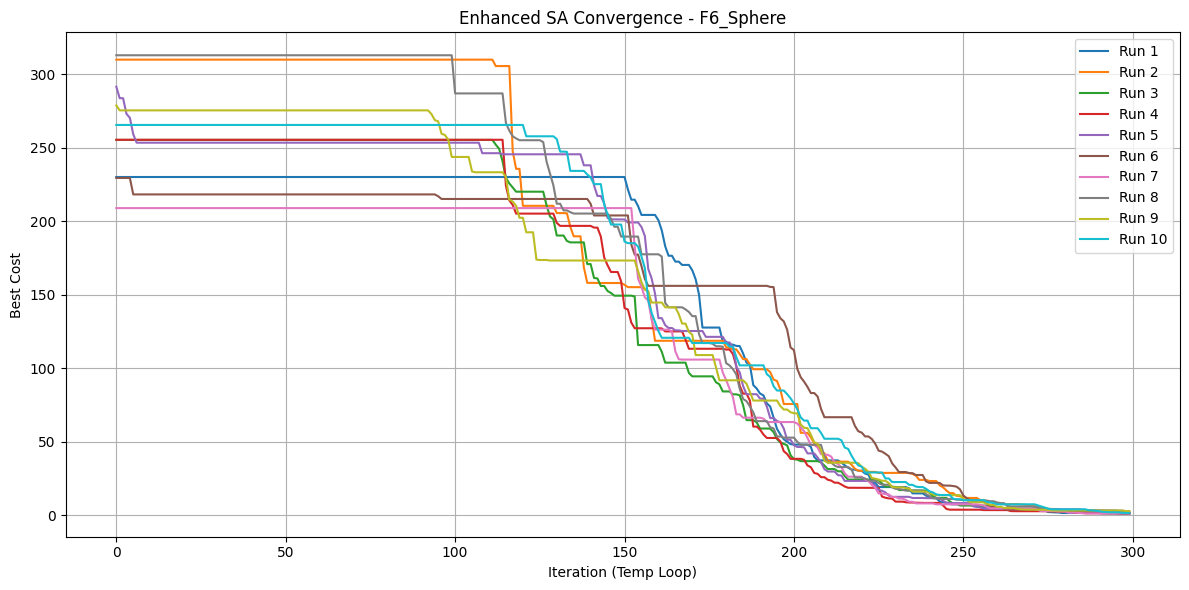


Running benchmark for: F7_Rosenbrock
Run 1: Simple SA = 48.052042, Enhanced SA = 132.600464
Run 2: Simple SA = 50.582169, Enhanced SA = 31.099339
Run 3: Simple SA = 285.571168, Enhanced SA = 593.146725
Run 4: Simple SA = 51.076298, Enhanced SA = 497.859710
Run 5: Simple SA = 2245.168410, Enhanced SA = 228.205324
Run 6: Simple SA = 51.476398, Enhanced SA = 1237.973306
Run 7: Simple SA = 476.006027, Enhanced SA = 29.447859
Run 8: Simple SA = 45.448719, Enhanced SA = 939.194774
Run 9: Simple SA = 46.501072, Enhanced SA = 29.702261
Run 10: Simple SA = 2223.538562, Enhanced SA = 89.749671


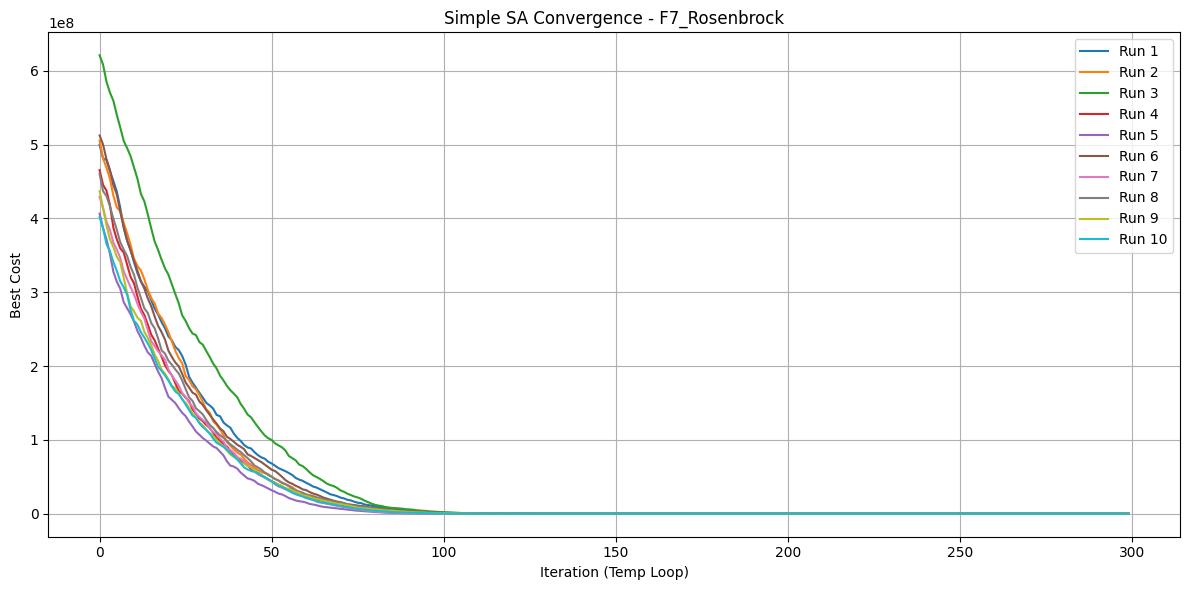

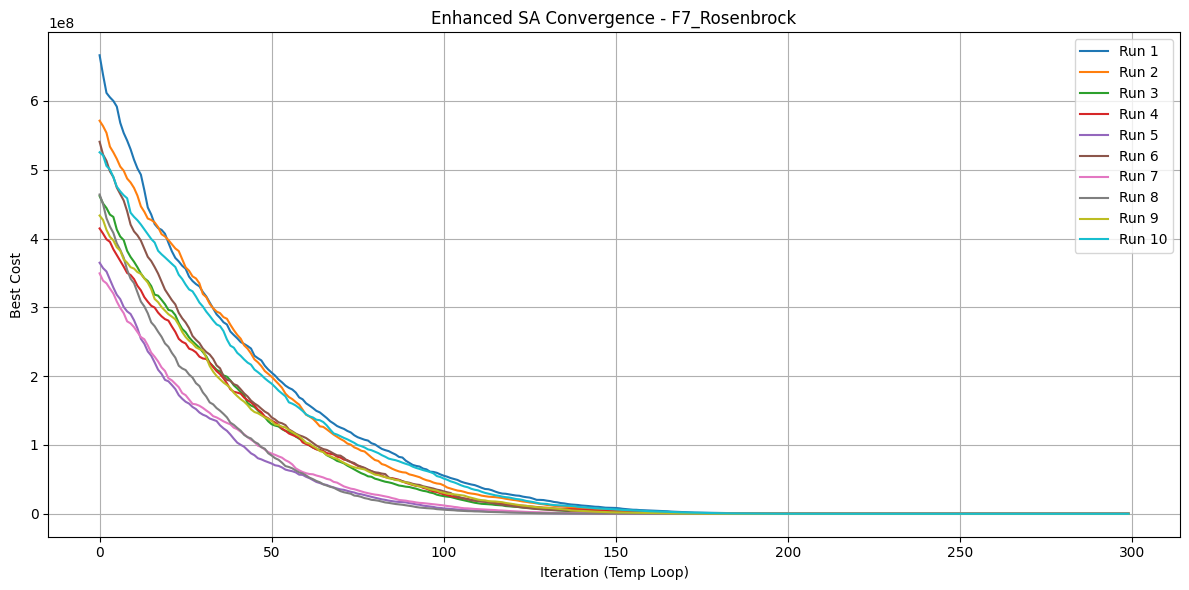


Running benchmark for: F8_Rastrigin
Run 1: Simple SA = 244.855808, Enhanced SA = 213.262441
Run 2: Simple SA = 193.455531, Enhanced SA = 236.109095
Run 3: Simple SA = 263.193147, Enhanced SA = 178.153272
Run 4: Simple SA = 194.212694, Enhanced SA = 172.820838
Run 5: Simple SA = 266.934378, Enhanced SA = 237.243736
Run 6: Simple SA = 320.092165, Enhanced SA = 313.439555
Run 7: Simple SA = 197.703510, Enhanced SA = 219.177150
Run 8: Simple SA = 244.873193, Enhanced SA = 170.264383
Run 9: Simple SA = 236.207379, Enhanced SA = 148.291194
Run 10: Simple SA = 231.975776, Enhanced SA = 168.117557


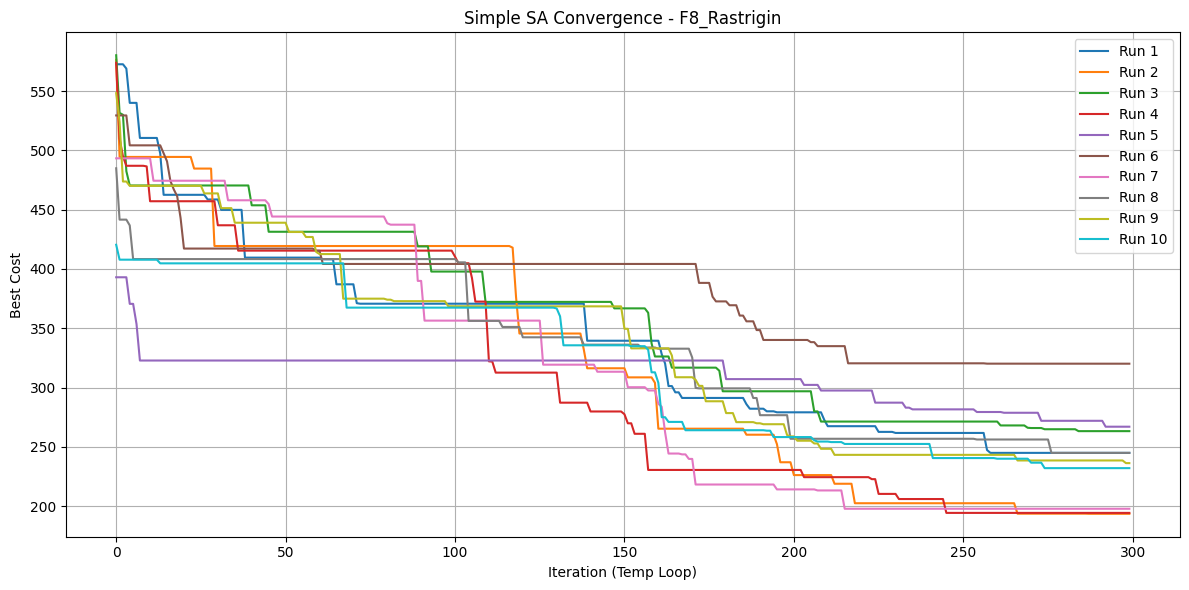

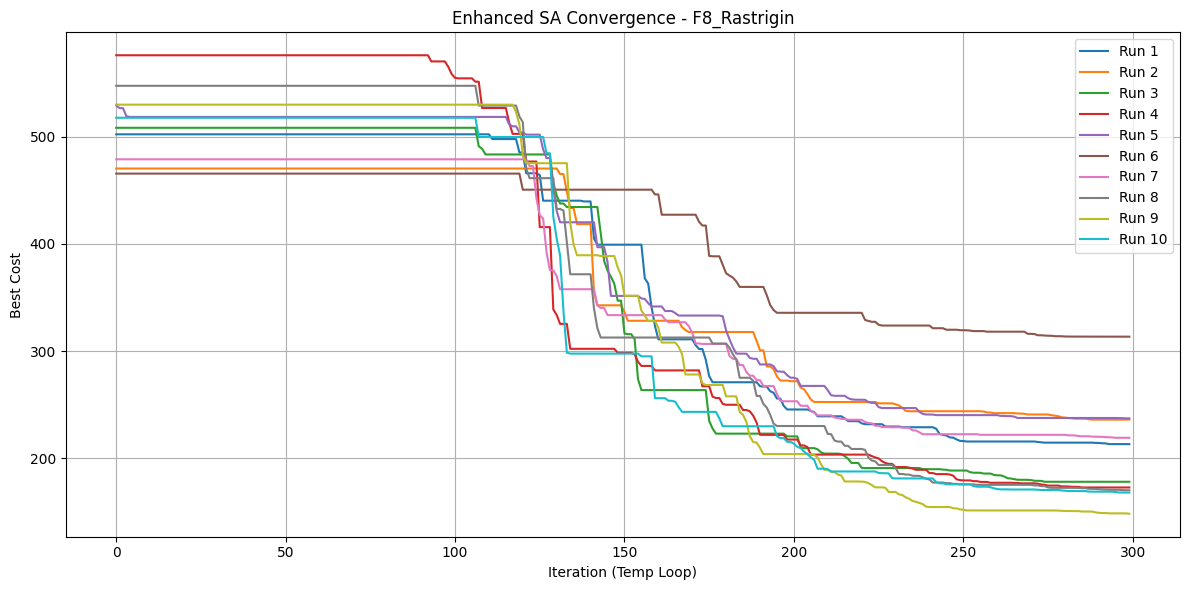


Running benchmark for: F9_Schwefel
Run 1: Simple SA = 8935.560387, Enhanced SA = 8211.013297
Run 2: Simple SA = 10038.946761, Enhanced SA = 7769.655339
Run 3: Simple SA = 8953.773903, Enhanced SA = 8223.338496
Run 4: Simple SA = 8776.916448, Enhanced SA = 7259.265025
Run 5: Simple SA = 10424.661283, Enhanced SA = 7844.803082
Run 6: Simple SA = 8419.682424, Enhanced SA = 8885.142163
Run 7: Simple SA = 11129.604157, Enhanced SA = 9463.451603
Run 8: Simple SA = 8778.221003, Enhanced SA = 9567.335299
Run 9: Simple SA = 11275.145756, Enhanced SA = 9652.884316
Run 10: Simple SA = 8844.783708, Enhanced SA = 9120.106454


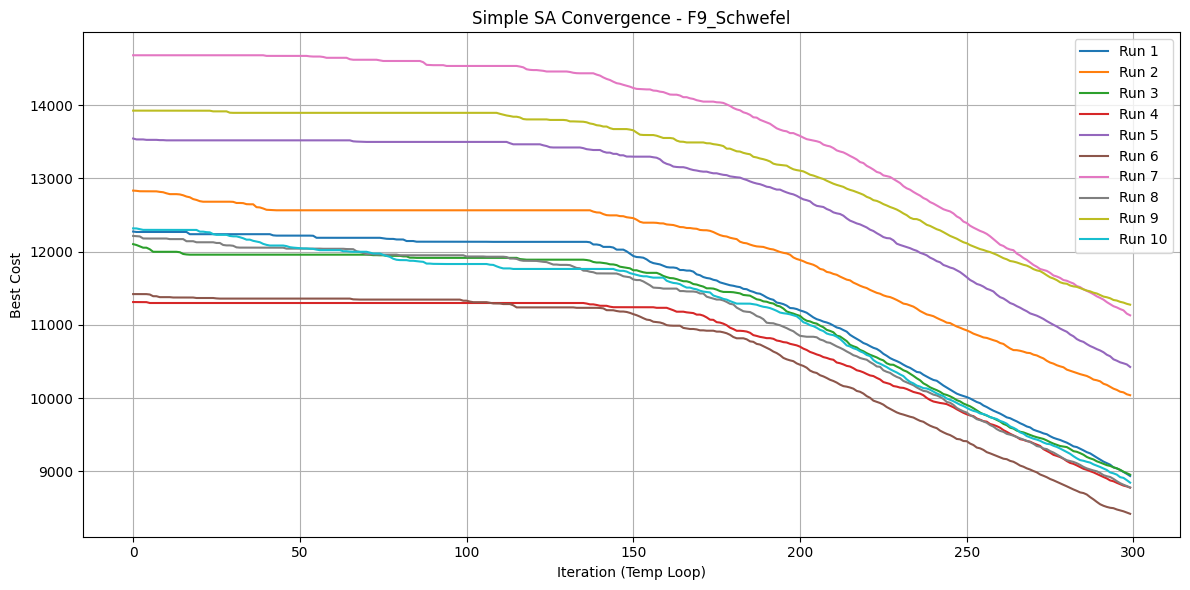

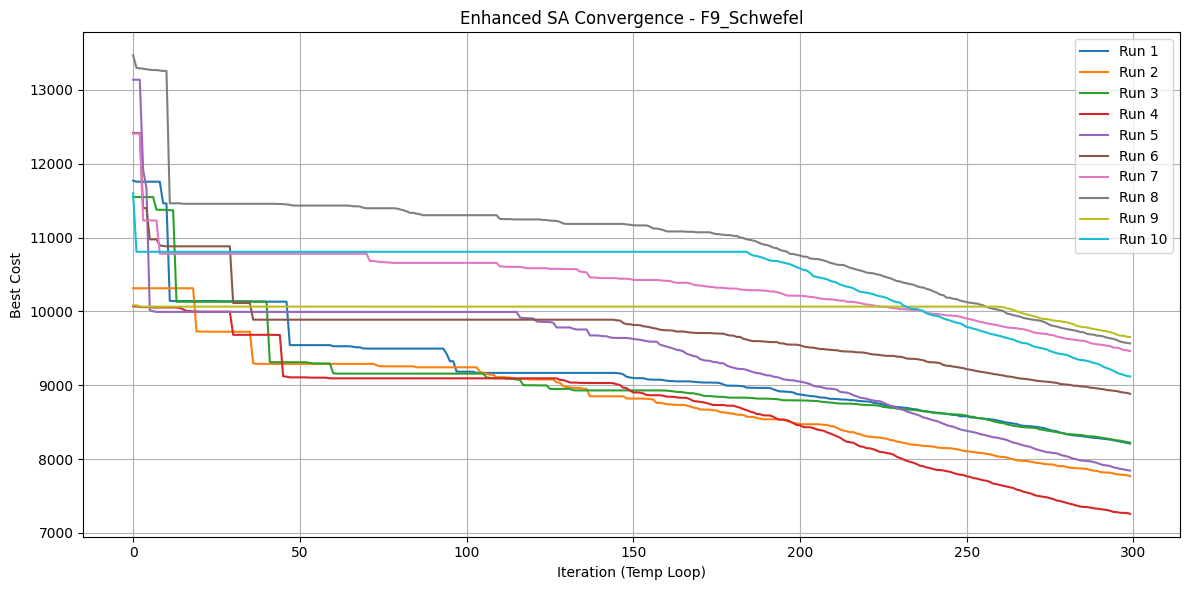


Running benchmark for: F10_Griewank
Run 1: Simple SA = 1181.313531, Enhanced SA = 657.619185
Run 2: Simple SA = 842.142670, Enhanced SA = 740.349052
Run 3: Simple SA = 902.615513, Enhanced SA = 915.961142
Run 4: Simple SA = 1019.023194, Enhanced SA = 738.939294
Run 5: Simple SA = 913.480643, Enhanced SA = 569.258995
Run 6: Simple SA = 712.173508, Enhanced SA = 633.014120
Run 7: Simple SA = 786.747981, Enhanced SA = 836.014912
Run 8: Simple SA = 709.075168, Enhanced SA = 673.906119
Run 9: Simple SA = 1027.005739, Enhanced SA = 663.079667
Run 10: Simple SA = 827.411554, Enhanced SA = 621.079995


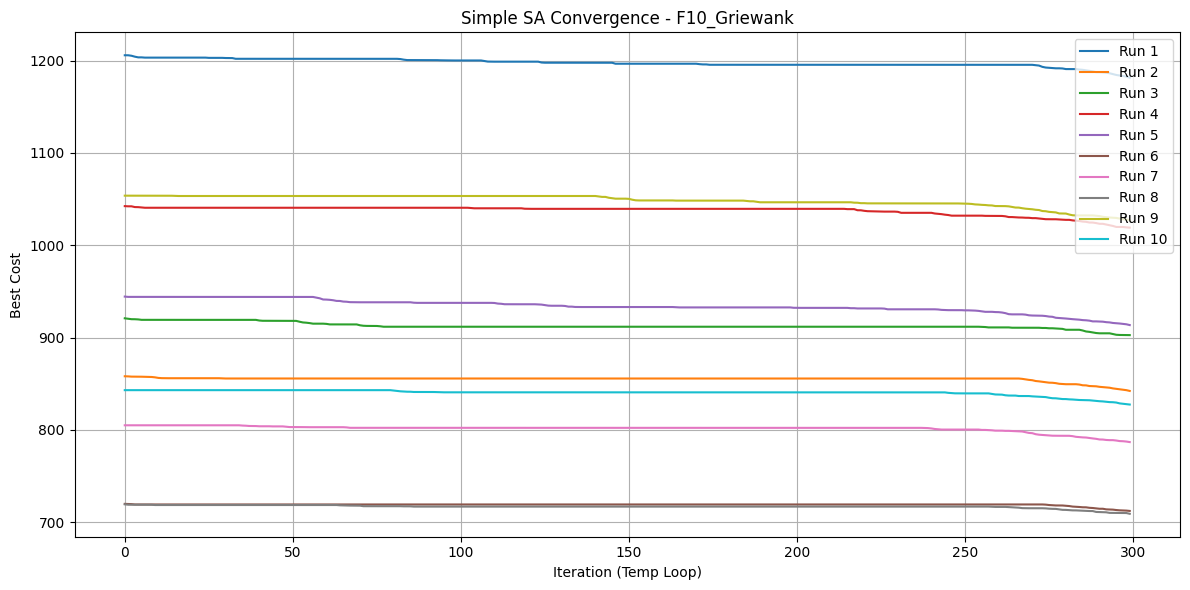

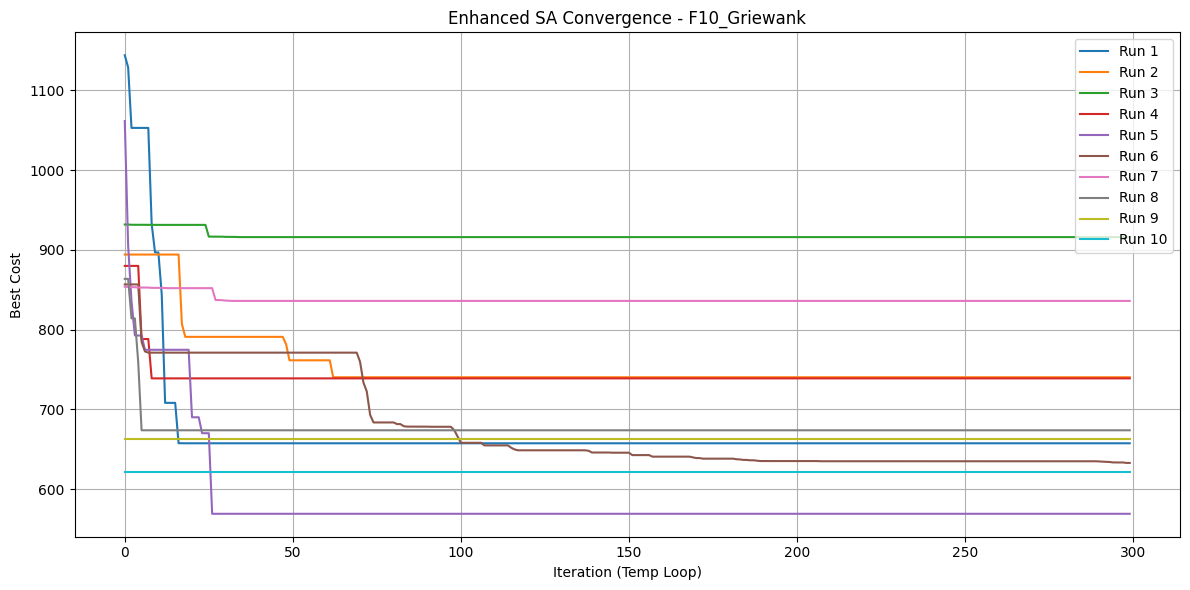


=== Final Summary Table (Average Results over 10 Runs) ===
Function		Simple SA Avg	Enhanced SA Avg	Improvement (%)
F1_Easom2D      	0.0000	-0.0220	inf%
F2_BeckerLago   	27.7504	28.0123	-0.94%
F3_Bohachevsky  	0.0008	0.0009	-15.42%
F4_Eggcrate     	8.0580	3.1453	60.97%
F5_PeriodicEval 	3.2471	3.5221	-8.47%
F6_Sphere       	1.2460	1.7596	-41.22%
F7_Rosenbrock   	552.3421	380.8979	31.04%
F8_Rastrigin    	239.3504	205.6879	14.06%
F9_Schwefel     	9557.7296	8599.6995	10.02%
F10_Griewank    	892.0990	704.9222	20.98%


<ipython-input-28-c4c3d27aea2d>:120: RuntimeWarning: divide by zero encountered in scalar divide
  improvement = ((simple_avg - enhanced_avg) / simple_avg) * 100


In [28]:
benchmark_functions = {
    "F1_Easom2D": f1_easom,
    "F2_BeckerLago": f2_becker_lago,
    "F3_Bohachevsky": f3_bohachevsky,
    "F4_Eggcrate": f4_eggcrate,
    "F5_PeriodicEval": f5_periodic_eval,
    "F6_Sphere": f6_sphere,
    "F7_Rosenbrock": f7_rosenbrock,
    "F8_Rastrigin": f8_rastrigin,
    "F9_Schwefel": f9_schwefel,
    "F10_Griewank": f10_griewank
}

benchmark_bounds = {
    "F1_Easom2D": (-100, 100),
    "F2_BeckerLago": (-10, 10),
    "F3_Bohachevsky": (-50, 50),
    "F4_Eggcrate": (-2 * np.pi, 2 * np.pi),
    "F5_PeriodicEval": (-10, 10),
    "F6_Sphere": (-5.12, 5.12),
    "F7_Rosenbrock": (-30, 30),
    "F8_Rastrigin": (-5.12, 5.12),
    "F9_Schwefel": (-500, 500),
    "F10_Griewank": (-600, 600)
}

# --- Simulated Annealing Benchmark Loop with Convergence Plotting ---
all_benchmark_results = {}

for name, func in benchmark_functions.items():
    print(f"\nRunning benchmark for: {name}")

    dim = 2 if name in ["F1_Easom2D", "F3_Bohachevsky", "F4_Eggcrate"] else 30
    bounds = [benchmark_bounds[name]] * dim

    results_simple = []
    results_enhanced = []
    conv_simple = []
    conv_enhanced = []

    for run in range(10):
        # Run simple SA with one neighbor
        sol_s, cost_s, convergence_s = sa_single_neighbor_with_convergence(
            func=func,
            bounds=bounds,
            dim=dim,
            T0=1000,
            alpha=0.97,
            beta=1,
            Mk=20,
            max_temp_loops=300,
            cooling='default'
        )
        results_simple.append(cost_s)
        conv_simple.append(convergence_s)

        # Reset roulette scores before each enhanced SA run
        global roulette_scores
        roulette_scores = [1.0 for _ in continuous_neighbor_functions]

        # Run enhanced SA with roulette wheel + neighbors
        sol_e, cost_e, convergence_e = enhanced_simulated_annealing_continuous_with_convergence(
            func=func,
            bounds=bounds,
            dim=dim,
            T0=1000,
            alpha=0.97,
            beta=1,
            Mk=20,
            max_temp_loops=300,
            cooling='default'
        )
        results_enhanced.append(cost_e)
        conv_enhanced.append(convergence_e)

        print(f"Run {run + 1}: Simple SA = {cost_s:.6f}, Enhanced SA = {cost_e:.6f}")

    # Save results
    all_benchmark_results[name] = {
        "simple_avg": sum(results_simple) / len(results_simple),
        "enhanced_avg": sum(results_enhanced) / len(results_enhanced),
        "simple_best": min(results_simple),
        "enhanced_best": min(results_enhanced),
        "simple_all": results_simple,
        "enhanced_all": results_enhanced,
    }

    # Plot Simple SA
    plt.figure(figsize=(12, 6))
    for i, conv in enumerate(conv_simple):
        plt.plot(conv, label=f"Run {i+1}")
    plt.title(f"Simple SA Convergence - {name}")
    plt.xlabel("Iteration (Temp Loop)")
    plt.ylabel("Best Cost")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot Enhanced SA
    plt.figure(figsize=(12, 6))
    for i, conv in enumerate(conv_enhanced):
        plt.plot(conv, label=f"Run {i+1}")
    plt.title(f"Enhanced SA Convergence - {name}")
    plt.xlabel("Iteration (Temp Loop)")
    plt.ylabel("Best Cost")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# --- Final Summary Table Across All Benchmark Functions ---
print("\n=== Final Summary Table (Average Results over 10 Runs) ===")
print("Function\t\tSimple SA Avg\tEnhanced SA Avg\tImprovement (%)")

for name in benchmark_functions:
    simple_avg = all_benchmark_results[name]["simple_avg"]
    enhanced_avg = all_benchmark_results[name]["enhanced_avg"]
    improvement = ((simple_avg - enhanced_avg) / simple_avg) * 100
    print(f"{name:<16}\t{simple_avg:.4f}\t{enhanced_avg:.4f}\t{improvement:.2f}%")


Main